<a>Importing Libraries and Modules in Python</a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler    

<a>Importing Dataset</a>

In [2]:
train_data = pd.read_csv("C:/GitHub/ML_DS_projects/Titanic_Machine_Learning_from_Disaster/Dataset/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("C:/GitHub/ML_DS_projects/Titanic_Machine_Learning_from_Disaster/Dataset/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Missing values:")
train_data.isna().sum()

Missing values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("Missing values:")
test_data.isna().sum()

Missing values:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis (EDA), Model Training, and Prediction

<a>Exploratory Data Analysis (EDA)</a>

Exploratory Data Analysis is a crucial step in understanding and preparing the data before building machine learning models. It involves examining the dataset's characteristics, identifying patterns, and making informed decisions about preprocessing.


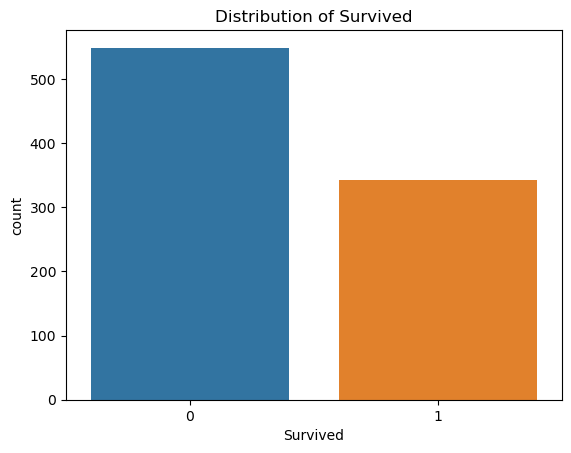

In [7]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()


In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men*100)

print("% of women who survived:", rate_women*100)

% of men who survived: 18.890814558058924
% of women who survived: 74.20382165605095


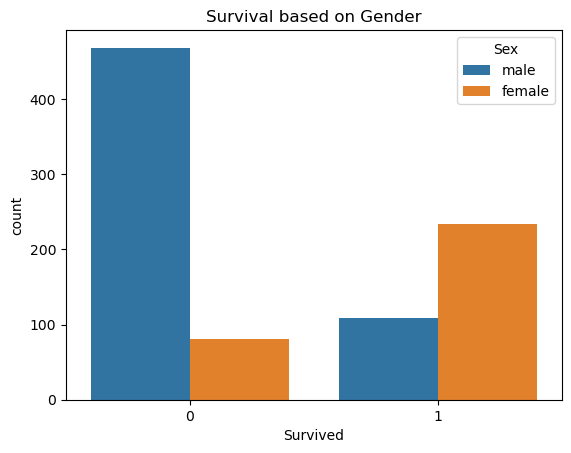

In [9]:
# Visualize the survival based on gender
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival based on Gender')
plt.show()

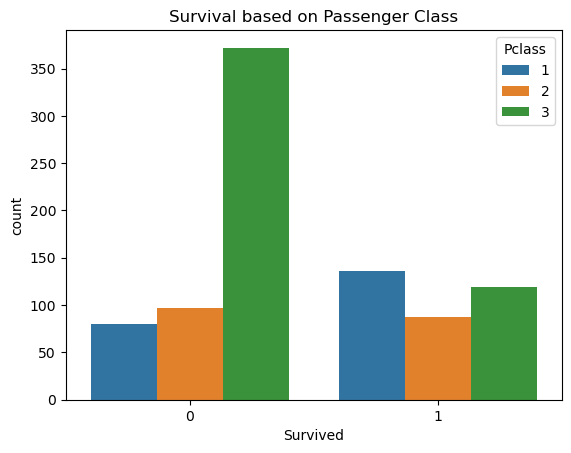

In [10]:
# Visualize the survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival based on Passenger Class')
plt.show()

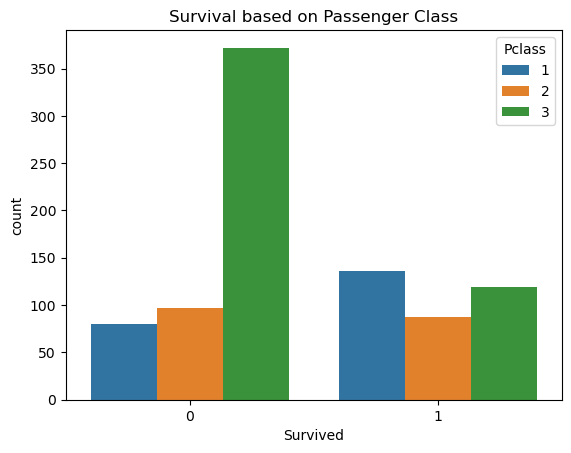

In [11]:
# Visualize the survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival based on Passenger Class')
plt.show()

c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


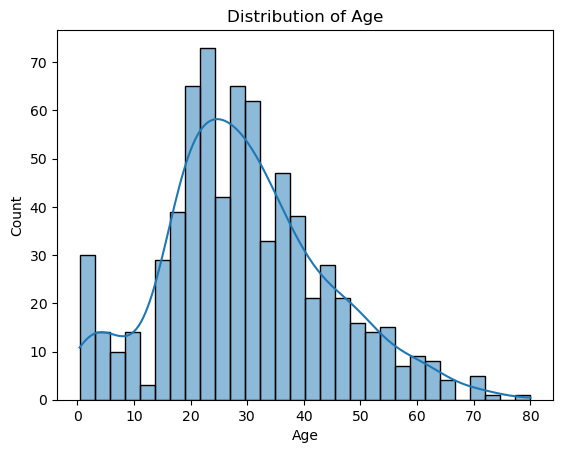

In [12]:
# Visualize the distribution of age
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()


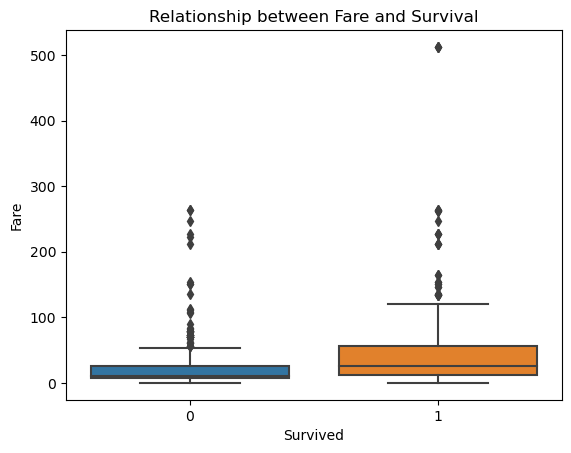

In [13]:
# Visualize the relationship between fare and survival
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Relationship between Fare and Survival')
plt.show()

<a> Data Cleaning for Titanic Dataset </a>

In [14]:
# Drop unnecessary columns from the training data
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Forward fill 'Cabin' column and replace NaN values with 'Z10'
train_data['Cabin'].ffill(inplace=True)
train_data['Cabin'].replace(np.nan, "Z10", inplace=True)

# Check for missing values in the training set
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64


In [15]:
# Impute missing values in 'Age' with the mean
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with 'C'
train_data["Embarked"] = train_data["Embarked"].fillna("C")

# Display the number of missing values after handling them
print("\nAfter filling missing values:")
print(train_data.isna().sum())


After filling missing values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [16]:
# Replace 'Sex' and 'Embarked' categorical values with numerical labels
train_data.Sex = train_data.Sex.replace(train_data.Sex.unique(), [0, 1])
train_data.Embarked = train_data.Embarked.replace(train_data.Embarked.unique(), [0, 1, 2])

# Convert 'Cabin' column to numerical labels using factorize
train_data.Cabin, _ = pd.factorize(train_data.Cabin)

# Display information about the cleaned training data
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [17]:
# Display the first 10 rows of the cleaned training data
train_data.head(10)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1
2,1,3,1,26.000000,0,0,7.9250,1,0
3,1,1,1,35.000000,1,0,53.1000,2,0
4,0,3,0,35.000000,0,0,8.0500,2,0
5,0,3,0,29.699118,0,0,8.4583,2,2
6,0,1,0,54.000000,0,0,51.8625,3,0
7,0,3,0,2.000000,3,1,21.0750,3,0
8,1,3,1,27.000000,0,2,11.1333,3,0
9,1,2,1,14.000000,1,0,30.0708,3,1


In [18]:
# Extract the target variable 'Survived' for training
train_y = train_data['Survived']
# Drop 'Survived' from feature matrix
train_data.drop(['Survived'], axis=1, inplace=True)
train_x = train_data


In [19]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
passenger = test_data['PassengerId']
# Drop unnecessary columns from the test data
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
passenger

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [21]:
# Forward fill 'Cabin' column and replace NaN values with 'Z10'
test_data['Cabin'].ffill(inplace=True)
test_data['Cabin'].replace(np.nan, "Z10", inplace=True)


In [22]:

# Impute missing values in 'Fare' and 'Age' with mean values
test_data['Fare'].replace(np.nan,ata['Age'].mean(), inplace=True) test_data['Fare'].mean(), inplace=True)
test_data['Age'].replace(np.nan, test_d

In [23]:
# Display the number of missing values in the test set after handling them
print("\nAfter filling missing values:")
print(test_data.isnull().sum())



After filling missing values:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [24]:
# Convert 'Cabin' column to numerical labels using factorize
test_data.Cabin, _ = pd.factorize(test_data.Cabin)
# Replace 'Sex' and 'Embarked' categorical values with numerical labels
test_data.Sex = test_data.Sex.replace(test_data.Sex.unique(), [0, 1])
test_data.Embarked = test_data.Embarked.replace(test_data.Embarked.unique(), [0, 1, 2])


In [25]:
# Display the first 10 rows of the cleaned test data
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,0,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,0,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1
5,3,0,14.0,0,0,9.2250,0,1
6,3,1,30.0,0,0,7.6292,0,0
7,2,0,26.0,1,1,29.0000,0,1
8,3,1,18.0,0,0,7.2292,0,2
9,3,0,21.0,2,0,24.1500,0,1


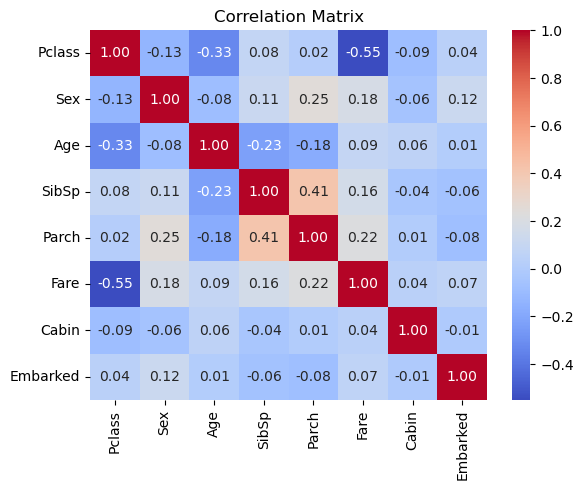

In [26]:
# Correlation matrix
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<a>Model Training</a>

# Logistic Regression

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that predict an outcome. It's commonly used for binary classification problems.

## Key Features

- Utilizes the logistic function to model the probability of a certain class.
- Regularization options to control overfitting.
- Interpretable coefficients.

In [27]:
# Import the logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model_LR = LogisticRegression()

# Fit the model to the training data
model_LR.fit(train_x, train_y)

# Predict the target variable for the test data
y_pred = model_LR.predict(test_data)
y_pred1 = model_LR.predict(train_data)
# Display the predicted values
y_pred


c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Logistic Regression model
accuracy_LR = accuracy_score(train_y, y_pred1)

# Display the accuracy
print("Accuracy of Logistic Regression Model:", accuracy_LR*100)


Accuracy of Logistic Regression Model: 79.57351290684625


# Decision Tree Classifier and Feature Scaling

## DecisionTreeClassifier

Decision Tree Classifier is a versatile and popular machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset based on feature conditions, creating a tree-like structure. Each leaf node represents a class or a regression value. Decision trees are known for their interpretability, ease of implementation, and ability to handle non-linear relationships.

## Why Standard Scaler?

**StandardScaler** is a preprocessing technique that standardizes the features by removing the mean and scaling to unit variance. Decision trees are generally not sensitive to the scale of features since they make decisions based on splitting conditions. However, when combining a Decision Tree Classifier with other models in a pipeline, such as in ensemble methods or when using different algorithms in the same pipeline, it's good practice to standardize features to ensure consistent behavior across models.

Standardization helps when:

- Combining models that are sensitive to feature scales.
- Ensuring convergence in iterative optimization algorithms (e.g., when using gradient-based methods).
- Improving interpretability of coefficients in linear models within the same pipeline.

## Using Pipeline

**Pipeline** is a convenient way to streamline a lot of routine processes by encapsulating multiple steps into a single object. In this case, we use a pipeline to combine two essential preprocessing steps:

1. **Imputation:** Handling missing values in the dataset, using the mean strategy.
2. **DecisionTreeClassifier:** Creating and training the Decision Tree model.

By using a pipeline, we ensure that these steps are executed in a consistent order, and the entire process can be easily reproduced and applied to new data.

## Conclusion

In summary, using a DecisionTreeClassifier with StandardScaler and a Pipeline can enhance the model's performance and maintain consistency in preprocessing steps. While Decision Trees are generally robust to feature scales, this approach ensures compatibility with other models and facilitates streamlined and reproducible machine learning workflows.


In [29]:
#feature Scaling  
st_x= StandardScaler()  
x_train= st_x.fit_transform(train_x)    
x_test= st_x.transform(test_data)   

In [30]:
# Assuming X is your feature matrix
# Create a pipeline with imputation and the DecisionTreeClassifier
model_DTC = make_pipeline(SimpleImputer(strategy='mean'), DecisionTreeClassifier())

# Fit the pipeline to your data
model_DTC.fit(train_x, train_y)

y_pred2 = model_DTC.predict(test_data)
y_pred2

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [31]:
# Create a DataFrame with 'PassengerId' and 'Survived' columns
output = pd.DataFrame({'PassengerId': passenger, 'Survived': y_pred2})

# Save the DataFrame to a CSV file
output.to_csv('submission.csv', index=False)


In [32]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model_DTC, file)